# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('human_body_temperature.csv')

In [8]:
#ECDF Function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)


    # x-data for the ECDF: x
    x = np.sort(data)


    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

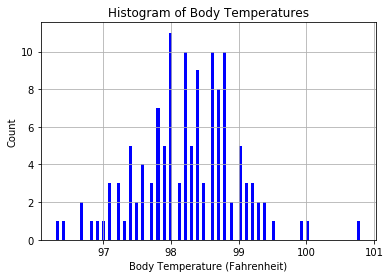

Mean Body Temperature: 98.24923076923078
Standard deviation: 0.7303577789050377


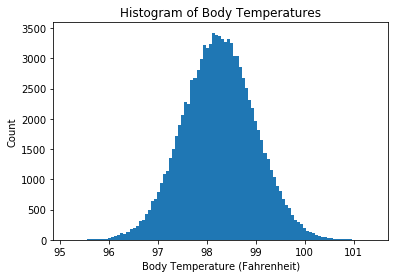

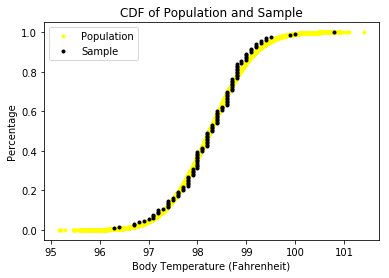

In [35]:
# Your work here.
df['temperature'].hist(bins = 100, color = 'blue')

plt.title('Histogram of Body Temperatures')
plt.xlabel('Body Temperature (Fahrenheit)')
plt.ylabel('Count')
plt.show()



#Histogram of Sample data
print('Mean Body Temperature: ' + str(np.mean(df.temperature)))
print('Standard deviation: ' + str(np.std(df.temperature)))


#plot a Histogram of Normal distribution with same mean/std to see if the Sample data forms a normal distribution
mu = np.mean(df.temperature)
sigma = np.std(df.temperature)
s = np.random.normal(mu, sigma, 100000)
plt.hist(s, bins = 100)
plt.title('Histogram of Body Temperatures')
plt.xlabel('Body Temperature (Fahrenheit)')
plt.ylabel('Count')
plt.show()

#plot ecdf functions against each other to check for normality
xsample, ysample = ecdf(df.temperature)
xpop, ypop = ecdf(s)
ecdf_graph = plt.plot(xpop, ypop, marker='.', linestyle ='none', color = 'yellow')
ecdf_graph = plt.plot(xsample, ysample, marker='.', linestyle='none', color = 'black')
plt.xlabel('Body Temperature (Fahrenheit)')
plt.ylabel('Percentage')
plt.title('CDF of Population and Sample')
plt.legend(('Population', 'Sample'))
plt.show()

1. The histogram shows a slight skew, which may exist because of the low sample size. However, the CDF graph shows that the sample data is, for the most part, in line with the CDF of the normal distribution

In [21]:
#sample size
print(len(df.temperature))

130


2. The sample size is sufficiently large, as it is >= 30. Also, the results are independent because one person's body temperature does not affect that of another.

3. In this scenario, we would use the one-sample test, as we are comparing one sample with the population. We would also use the t-test, since we do not know the standard deviation of the population mean.

Using the one-sample t-test, we get the following value
t = (98.24923 - 98.6)/(0.730357/sqrt(130)) = -5.4760


Using a one-sample z-test, we get the following value
Z = (98.24923 - 98.6)/(0.62/sqrt(130)) = -6.4599

They are different because the sample standard deviation and the population standard deviation are different, even though all other variables are the same


In [23]:
#Generate a sample size of 10 for question 4
sample_temps = np.random.choice(df.temperature, 10)

print(sample_temps)

[ 97.9  97.4  99.3  97.4  98.3  97.4  98.   97.3  98.7  99.3]


4. We received the following array of body temperatures from the np.random.choice method above

[ 97.9  97.4  99.3  97.4  98.3  97.4  98.   97.3  98.7  99.3], and the sample mean of this data is 98.1, and standard dev of 0.73756

Regardless of whether or not we know the population's standard deviation, because the sample size is < 30, t-test is the more appropriate choice.

t = (98.1 - 98.6)/(0.73756/sqrt(10)) = -2.1437
Z = (98.1 - 98.6)/(0.62/sqrt(10)) = -2.55024

What we notice in both this problem and the previous is that since the standard deviation of the population is smaller than that of the sample, using the Z test yields a lower value than that of a t-test


In [39]:
#margin of errors
ME_95 = 1.96 * (0.73/np.sqrt(130))
ME_99 = 2.58 * (0.73/np.sqrt(130))

#Mean temperature
mean_temp = np.mean(df.temperature)

#Create list of confidence interval
CI_95 = [mean_temp-ME_95, mean_temp+ME_95]
CI_99 = [mean_temp-ME_99, mean_temp+ME_99]

print(CI_95)
print(CI_99)

[98.123741307828325, 98.37472023063323]
[98.084045661874498, 98.414415876587057]


5. 95% CI Margin of error = 1.96 * (0.73/sqrt(130)) = 0.1255
99% CI Margin of error = 2.58 * (0.73/sqrt(130)) = 0.1651

95% CI is [98.1237, 98.3747]

99% CI is [98.0840, 98.4144]

Anything higher than 98.3747 or lower than 98.12376 would be considered "abnormal", assuming alpha of 0.05
Anything higher than 98.4144 or lower than 98.0840 would be considered "abnormal", assuming alpha of 0.01

65
65
Mean of males: 98.1046153846154
Standard Deviation of males: 0.6933598841828696
Mean of females: 98.39384615384613
Standard Deviation of females: 0.7377464486428966


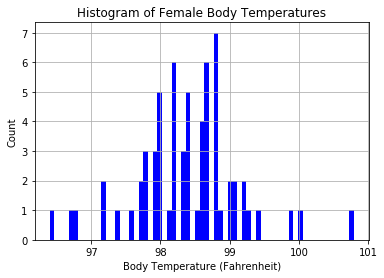

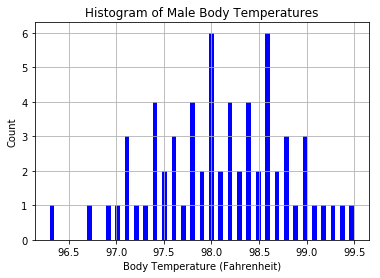

In [37]:
#create dataframes separated by gender
df_males = df[df.gender == 'M']
df_females = df[df.gender == 'F']

#find number of males/females in the dataset
print(len(df_males))
print(len(df_females))

#find mean/std of each
print('Mean of males: ' + str(np.mean(df_males.temperature)))
print('Standard Deviation of males: ' + str(np.std(df_males.temperature)))
print('Mean of females: ' + str(np.mean(df_females.temperature)))
print('Standard Deviation of females: ' + str(np.std(df_females.temperature)))

df_females['temperature'].hist(bins = 65, color = 'blue')

plt.title('Histogram of Female Body Temperatures')
plt.xlabel('Body Temperature (Fahrenheit)')
plt.ylabel('Count')
plt.show()


df_males['temperature'].hist(bins = 65, color = 'blue')

plt.title('Histogram of Male Body Temperatures')
plt.xlabel('Body Temperature (Fahrenheit)')
plt.ylabel('Count')
plt.show()

6. We will use two-sample t-test for determining if there is significance in difference of body temperatures in males and females, since we have two independent samples with different means

Difference in means: 98.3938 - 98.1046 = 0.2892


t = 0.2892/(0.73035/sqrt(130)) = 2.302

The p-value for this statistic is 0.0246, which is significant at the p < 0.05 level.


One very interesting pattern to note in each histogram (combined, male, and female) is that almost every other bin interval shows a large spike, then reduction in count that seems almost uncoincidental. One possible explanation is the conversion from Celsius to Fahrenheit, which might be skew the data, as the data is rounded to the nearest tenth in Fahrenheit.